<a href="https://colab.research.google.com/github/SecureGitWire/GoogleCollabeTensorflowDev/blob/main/ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer Vision -- Algorithims that can discover patterns in visual data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get Data

The images in this excercise are from https://kaggle.com/dansbecker/food-101

The data has been modified to only use two classes Pizza and Steak using the image data modification notebook.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In this excercise a smaller dataset is used for experimentation.

In [2]:
# Excercise Dataset ** Resource ** -- kaggle.com/dansbecker/food-101
# Data has been modified before being used in the course
# Data Repository -- github.com/mrdbourke/tensorflow-deep-learning/tree/main/extras
# Import Zip to unzip Dataset

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-03-27 22:40:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.250.157.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.2MB/s    in 4.3s    

2023-03-27 22:40:55 (24.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the Dataset

During machine learning modeling it's a common good practice to inspect and visualize the data.

For a Computer Vision Project, Visualizing Samples of your Data.

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/pizza | head

1008104.jpg
1008144.jpg
1008844.jpg
1008941.jpg
1011404.jpg
102037.jpg
1026922.jpg
1029698.jpg
1033251.jpg
1035854.jpg


In [6]:
import os

#walk through the pizza directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# Alternatively an additional way to determine number of images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To Visualize images, let's get a list of class names programmatically

In [8]:
# Get Class Names Programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a list of class_names from the subdicrectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names),data_dir

['pizza' 'steak']


(None, PosixPath('pizza_steak/train'))

In [9]:
# Visualize Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup Target Directory (View images using this function)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

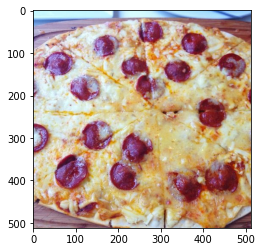

In [10]:
image_read = mpimg.imread("pizza_steak/train/pizza/2664219.jpg")
plt.imshow(image_read)

In [11]:
image_read.shape

(512, 512, 3)

['2456207.jpg']
Image shape: (384, 512, 3)


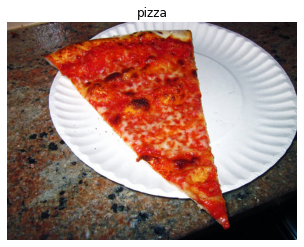

In [12]:
# View random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [13]:
img

array([[[124, 102,  79],
        [126, 104,  83],
        [127, 104,  88],
        ...,
        [ 26,  20,  22],
        [ 25,  19,  21],
        [ 27,  21,  23]],

       [[127, 106,  85],
        [128, 107,  88],
        [129, 108,  91],
        ...,
        [ 29,  23,  25],
        [ 28,  22,  24],
        [ 31,  25,  27]],

       [[128, 107,  88],
        [129, 108,  91],
        [129, 107,  93],
        ...,
        [ 28,  22,  24],
        [ 27,  21,  23],
        [ 30,  24,  26]],

       ...,

       [[ 49,  38,  34],
        [ 55,  44,  38],
        [ 49,  39,  30],
        ...,
        [ 94, 154, 182],
        [ 46,  61,  90],
        [  0,   2,   0]],

       [[ 50,  41,  32],
        [ 53,  43,  34],
        [ 46,  36,  26],
        ...,
        [ 46, 113, 122],
        [ 96, 149, 165],
        [ 37,  49,  73]],

       [[ 48,  39,  30],
        [ 47,  39,  28],
        [ 42,  34,  23],
        ...,
        [  0,  47,  42],
        [ 86, 170, 170],
        [117, 135, 183]]

In [14]:
img.dtype

dtype('uint8')

In [15]:
import tensorflow as tf
img.shape

(384, 512, 3)

512 Width, 512, Length, 3 RBG -- For each image sample
Returns width, height, colour channels RGB

In [16]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[124, 102,  79],
        [126, 104,  83],
        [127, 104,  88],
        ...,
        [ 26,  20,  22],
        [ 25,  19,  21],
        [ 27,  21,  23]],

       [[127, 106,  85],
        [128, 107,  88],
        [129, 108,  91],
        ...,
        [ 29,  23,  25],
        [ 28,  22,  24],
        [ 31,  25,  27]],

       [[128, 107,  88],
        [129, 108,  91],
        [129, 107,  93],
        ...,
        [ 28,  22,  24],
        [ 27,  21,  23],
        [ 30,  24,  26]],

       ...,

       [[ 49,  38,  34],
        [ 55,  44,  38],
        [ 49,  39,  30],
        ...,
        [ 94, 154, 182],
        [ 46,  61,  90],
        [  0,   2,   0]],

       [[ 50,  41,  32],
        [ 53,  43,  34],
        [ 46,  36,  26],
        ...,
        [ 46, 113, 122],
        [ 96, 149, 165],
        [ 37,  49,  73]],

       [[ 48,  39,  30],
        [ 47,  39,  28],
        [ 42,  34,  23],
        ...,
        [  0,  47,  4

In [17]:
np.max(img),np.min(img)

(255, 0)

In [18]:
img/255.

array([[[0.48627451, 0.4       , 0.30980392],
        [0.49411765, 0.40784314, 0.3254902 ],
        [0.49803922, 0.40784314, 0.34509804],
        ...,
        [0.10196078, 0.07843137, 0.08627451],
        [0.09803922, 0.0745098 , 0.08235294],
        [0.10588235, 0.08235294, 0.09019608]],

       [[0.49803922, 0.41568627, 0.33333333],
        [0.50196078, 0.41960784, 0.34509804],
        [0.50588235, 0.42352941, 0.35686275],
        ...,
        [0.11372549, 0.09019608, 0.09803922],
        [0.10980392, 0.08627451, 0.09411765],
        [0.12156863, 0.09803922, 0.10588235]],

       [[0.50196078, 0.41960784, 0.34509804],
        [0.50588235, 0.42352941, 0.35686275],
        [0.50588235, 0.41960784, 0.36470588],
        ...,
        [0.10980392, 0.08627451, 0.09411765],
        [0.10588235, 0.08235294, 0.09019608],
        [0.11764706, 0.09411765, 0.10196078]],

       ...,

       [[0.19215686, 0.14901961, 0.13333333],
        [0.21568627, 0.17254902, 0.14901961],
        [0.19215686, 0

# An example of a convolutional neural network
Build a Convolutional Neural Network to find patterns in a set of Images
* Load Images
* Preprocess Images
* Build a CNN to identify patterns in images
* Compile Images
* Fit CNN to the Training Data Images

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, Normalization/Scaling/MinMaxScaler)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches

# Train Data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
# Image originial size is 512 X 512, setting the target_size reshapes the images 
# 224 X 224. Using 224 X 224 holds most of the information in an image and holds less data.

#Validation Data
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=23,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile CNN Model
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 140s 3s/step - loss: 0.5500 - accuracy: 0.7200 - val_loss: 0.4453 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 124s 3s/step - loss: 0.4516 - accuracy: 0.8007 - val_loss: 0.3927 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 127s 3s/step - loss: 0.4008 - accuracy: 0.8347 - val_loss: 0.3473 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 126s 3s/step - loss: 0.3440 - accuracy: 0.8520 - val_loss: 0.3460 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 134s 3s/step - loss: 0.2504 - accuracy: 0.9113 - val_loss: 0.3863 - val_accuracy: 0.8360


In [20]:
# Runtime using CPU
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 89s 2s/step - loss: 0.6236 - accuracy: 0.6327 - val_loss: 0.4715 - val_accuracy: 0.7660

# Runtime using GPU
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 24s 241ms/step - loss: 0.5791 - accuracy: 0.7027 - val_loss: 0.4076 - val_accuracy: 0.8260
# Epoch 2/5
# 47/47 [==============================] - 10s 223ms/step - loss: 0.4282 - accuracy: 0.8007 - val_loss: 0.4399 - val_accuracy: 0.7960

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.

Batch Size set to 32
1500 images / 32 = 47

47 batches with a batch size of 32
1 Epoch = One Training Cycle over the entire Dataset

1 Epoch = 47 Batches of 32 Images = 1500 Total Images

In [21]:
len(train_data)

47

In [22]:
1500 / 32

46.875

In [23]:
# Model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Build a Classification Neural Network

Test Performance using a Classification Neural Network and a Complex dataset (Image Dataset)

In [24]:
# Set Random Seed
tf.random.set_seed

# Create Model to replicate tensorflow playground model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#Compile Model
model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit Model
model_2.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data), 
            validation_data=valid_data, 
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 315ms/step - loss: 1.6107 - accuracy: 0.4987 - val_loss: 0.7728 - val_accuracy: 0.4300
Epoch 2/5
47/47 [==============================] - 15s 327ms/step - loss: 0.7043 - accuracy: 0.4620 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 325ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 313ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 323ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [25]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1505290   
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Set Random Seed
tf.random.set_seed

# Create Model to replicate tensorflow playground model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#Compile Model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Fit Model
model_3.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data), 
            validation_data=valid_data, 
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 479ms/step - loss: 3.2557 - accuracy: 0.6307 - val_loss: 0.9555 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 22s 457ms/step - loss: 0.8774 - accuracy: 0.7300 - val_loss: 0.4649 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 20s 430ms/step - loss: 0.5578 - accuracy: 0.7600 - val_loss: 0.9270 - val_accuracy: 0.6620
Epoch 4/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5243 - accuracy: 0.7707 - val_loss: 0.6395 - val_accuracy: 0.7060
Epoch 5/5
47/47 [==============================] - 37s 785ms/step - loss: 0.7209 - accuracy: 0.7393 - val_loss: 0.5848 - val_accuracy: 0.7280


In [27]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [29]:
15073201/31101

484.6532587376612

In [30]:
#Model_3 has 500x more paramaters than Model_1

In [31]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#Binary Classification -- Review

1. Review Data -- Visualize Data
2. Preprocess Data
3. Create Model
4. Fit Model
5. Evaluate Model
6. Hyperparameter Tuning - Adjust Model Parameters - Improve Performance
7. Repeat to improve Model Performance

##1. Visualize Data

In [32]:
!ls pizza_steak/train/pizza | head

1008104.jpg
1008144.jpg
1008844.jpg
1008941.jpg
1011404.jpg
102037.jpg
1026922.jpg
1029698.jpg
1033251.jpg
1035854.jpg


In [33]:
 !ls pizza_steak/train/steak | head

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg


In [34]:
steak_img = mpimg.imread("/content/pizza_steak/train/steak/10380.jpg")
pizza_img = mpimg.imread("/content/pizza_steak/train/pizza/1026922.jpg")

In [35]:
steak_img.shape, pizza_img.shape

((288, 512, 3), (306, 512, 3))

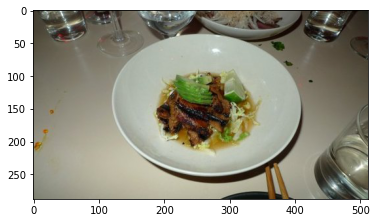

In [36]:
plt.imshow(steak_img)

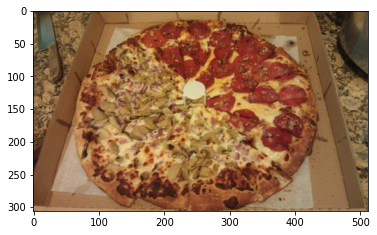

In [37]:
plt.imshow(pizza_img)

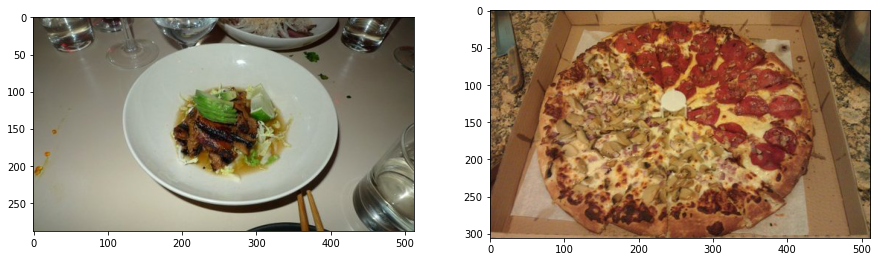

In [38]:
# Visualize data
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(steak_img)
plt.subplot(1,2,2)
plt.imshow(pizza_img)

# 2. Pre Process Data -- Prepare data for modeling

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
#Set Random Seed
tf.random.set_seed(42)

In [41]:
# Define Dataset Directory Paths
train_dir = "/content/pizza_steak/train"
valid_dir = "/content/pizza_steak/test"

In [42]:
# Pre Process Image Dataset - Normalize Image Dataset -- Convert Pixels from values between 0 - 255 to values between 0 - 1
# ImageDataGenerator is used to normalize data as it is being read
train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

In [43]:
# Import Data from the Dataset Directory and Convert into batches of 32

# Train Data
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42) # Seed to shuffle data
valid_data = valid_data_gen.flow_from_directory(directory=valid_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42) # Seed to shuffle data

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [44]:
images, labels = train_data.next() # Get next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [45]:
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [46]:
# How many batches?
len(train_data)

47

In [47]:
1500/32

46.875

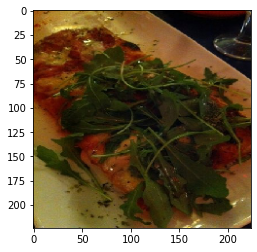

In [48]:
plt.imshow(images[2])

In [49]:
images[0].shape, labels[0]

((224, 224, 3), 1.0)

In [50]:
images[0]

array([[[0.42352945, 0.43137258, 0.34509805],
        [0.31764707, 0.3254902 , 0.2392157 ],
        [0.26666668, 0.28235295, 0.18431373],
        ...,
        [0.42352945, 0.34901962, 0.37254903],
        [0.427451  , 0.34901962, 0.39607847],
        [0.45098042, 0.36862746, 0.427451  ]],

       [[0.2901961 , 0.30588236, 0.21568629],
        [0.45882356, 0.47450984, 0.37647063],
        [0.2627451 , 0.28627452, 0.18431373],
        ...,
        [0.39607847, 0.34117648, 0.34117648],
        [0.4156863 , 0.36862746, 0.37647063],
        [0.39607847, 0.34901962, 0.3647059 ]],

       [[0.37254903, 0.39607847, 0.29411766],
        [0.39607847, 0.41960788, 0.31764707],
        [0.30588236, 0.34117648, 0.23529413],
        ...,
        [0.34509805, 0.3254902 , 0.3019608 ],
        [0.30980393, 0.29803923, 0.27058825],
        [0.3372549 , 0.3254902 , 0.30588236]],

       ...,

       [[0.5137255 , 0.5019608 , 0.54509807],
        [0.52156866, 0.50980395, 0.54509807],
        [0.5294118 , 0

In [51]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

In [52]:
# 1. Create Convolutional Neural Network

model_test = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,
                          activation="sigmoid")
])

In [53]:
# 2. Compile the Model

model_test.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007),
    metrics = ["accuracy"]
)

In [54]:
# Create a Learning Rate Scheduler

lrs_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))

In [ ]:
# 3. Fit the model
history_test = model_test.fit(train_data,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        #callbacks=[lrs_scheduler],
                        epochs=4)

Epoch 1/4
47/47 [==============================] - 155s 3s/step - loss: 0.5829 - accuracy: 0.6813 - val_loss: 0.4541 - val_accuracy: 0.8100
Epoch 2/4
47/47 [==============================] - 136s 3s/step - loss: 0.4466 - accuracy: 0.7967 - val_loss: 0.3769 - val_accuracy: 0.8540
Epoch 3/4
 1/47 [..............................] - ETA: 1:56 - loss: 0.3906 - accuracy: 0.8125

In [ ]:
pd.DataFrame(history_test.history)

In [ ]:
pd.DataFrame(history_test.history).plot()

In [ ]:
lrs = 1e-4 * (10**(tf.range(40)/20))
lrs

In [ ]:
1e-4 * 10**(tf.range(40)/20)

In [ ]:
# plt.figure(figsize=(10,10))
# plt.subplot(1,2,1)
# plt.semilogx(lrs, history_test.history["loss"])
# plt.subplot(1,2,2)
# plt.semilogx(lrs, history_test.history["val_loss"])

In [ ]:
# Make Model Creating easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Activation
from tensorflow.keras import Sequential

# Create Model
model_4 = Sequential([
    Conv2D(filters=10, # Filters are number of sliding windows going across an input
           kernel_size=3, # The size of the sliding window going across an input
           strides=1, # The size of the step the sliding window wakes across an input, Output Shape compressed with higher strides
           padding="valid", # If "same", (Preserves Input Shape) Output shape is same as input space (Padding), If "valid" (No Padding) Output Shape is Compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"),
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile Model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_4.summary()

In [ ]:
#Fit Model
model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

In [ ]:
model_1.evaluate(valid_data)

In [ ]:
model_1.summary()

In [ ]:
model_4.evaluate(valid_data)

In [ ]:
model_4.summary()

### 6. Adjust model parameters

Fitting a machine learning model comes in 3 steps

  0. Create a Baseline
  1. Improve baseline by overfitting a larger model
  2. Reduce Overfitting

Ways to produce Overfitting

* Increase number of convolutional layers
* Increase number of convolutional filters
* Add an additional dense layer to the output of the flattened layer

Ways to reduce Overfitting
* Add Data Augmentation
* Add Regularization Layers (MaxPool2D)
* Add more data

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Activations